In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt


In [ ]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([finger], dtype=np.uint16)

In [ ]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)

            data.append([label[0], img_resize ])
    return data


In [ ]:
Real_path = "/content/drive/MyDrive/SOCOFing/Real"
Easy_path = "/content/drive/MyDrive/SOCOFing/Altered/Altered-Easy"
Medium_path = "/content/drive/MyDrive/SOCOFing/Altered/Altered-Medium"
Hard_path = "/content/drive/MyDrive/SOCOFing/Altered/Altered-Hard"

In [ ]:
Easy_data = loading_data(Easy_path,True)
Medium_data = loading_data(Medium_path,True)
Hard_data = loading_data(Hard_path, True)
data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)

del Easy_data, Medium_data, Hard_data

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import random
random.shuffle(data)

In [ ]:
img, labels = [], []
for label, feature in data:
    labels.append(label)
    img.append(feature)

In [ ]:
import matplotlib.pyplot as plt
# Count occurrences of each gender
count1 = labels.count(0)
count2 = labels.count(1)
count3 = labels.count(2)
count4 = labels.count(3)
count5 = labels.count(4)
# Plotting the bar graph
plt.bar(['thumb','index','middle','ring','little'], [count1,count2, count3,count4,count5], color=['blue', 'red','blue', 'red','blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Finger Name')
plt.show()

In [ ]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(labels, num_classes = 5)

In [ ]:
labels = np.array(labels)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 30,
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/30
308/308 [==============================] - 469s 2s/step - loss: 0.6466 - accuracy: 0.7887 - val_loss: 0.4388 - val_accuracy: 0.7970
Epoch 2/30
308/308 [==============================] - 471s 2s/step - loss: 0.3730 - accuracy: 0.8199 - val_loss: 0.3537 - val_accuracy: 0.8329
Epoch 3/30
308/308 [==============================] - 475s 2s/step - loss: 0.2761 - accuracy: 0.8826 - val_loss: 0.2848 - val_accuracy: 0.8776
Epoch 4/30
308/308 [==============================] - 477s 2s/step - loss: 0.2011 - accuracy: 0.9379 - val_loss: 0.2282 - val_accuracy: 0.9215
Epoch 5/30
308/308 [==============================] - 480s 2s/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.1471 - val_accuracy: 0.9473
Epoch 6/30
308/308 [==============================] - 463s 1s/step - loss: 0.0514 - accuracy: 0.9859 - val_loss: 0.1129 - val_accuracy: 0.9612
Epoch 7/30
308/308 [==============================] - 472s 2s/step - loss: 0.0289 - accuracy: 0.9933 - val_loss: 0.1054 - val_accuracy: 0.9674

(0.0, 1.0)

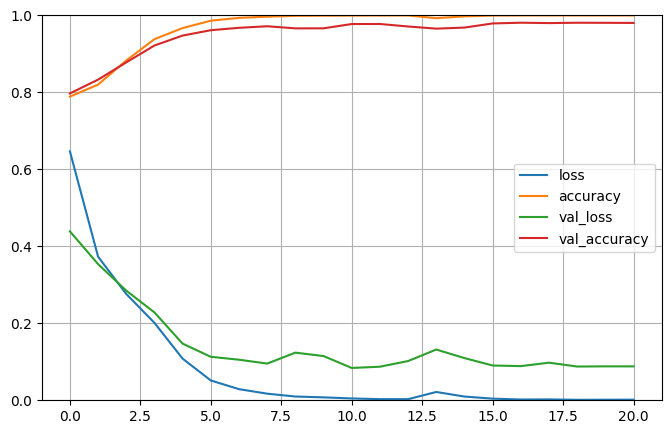

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
test_data = loading_data(Real_path,False)
random.shuffle(test_data)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

In [ ]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
# x_test = x_test / 255.0
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [ ]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 18s 96ms/step - loss: 0.0416 - accuracy: 0.9940


[0.04159923642873764, 0.9940000176429749]

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['thumb','index','middle','ring','little'], columns=['thumb','index','middle','ring','little'])
plt.title("Confusion matrix for the model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names= labels))

In [ ]:
model.save('GenderFP2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
for i in range(5):
    print('True: ',y_test[i])
    print('predicted: ',((model.predict(np.expand_dims(x_test[i],0))>0.5).astype(np.int32))[0])
    print()
    plt.imshow(x_test[i],'gray')
    plt.show()